In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
iris = datasets.load_iris()

In [3]:
header = iris.feature_names + ['Type']
data = np.concatenate((iris.data, iris.target.reshape(150,1)),axis = 1)
irisDF = pd.DataFrame(data, columns = header)

In [4]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

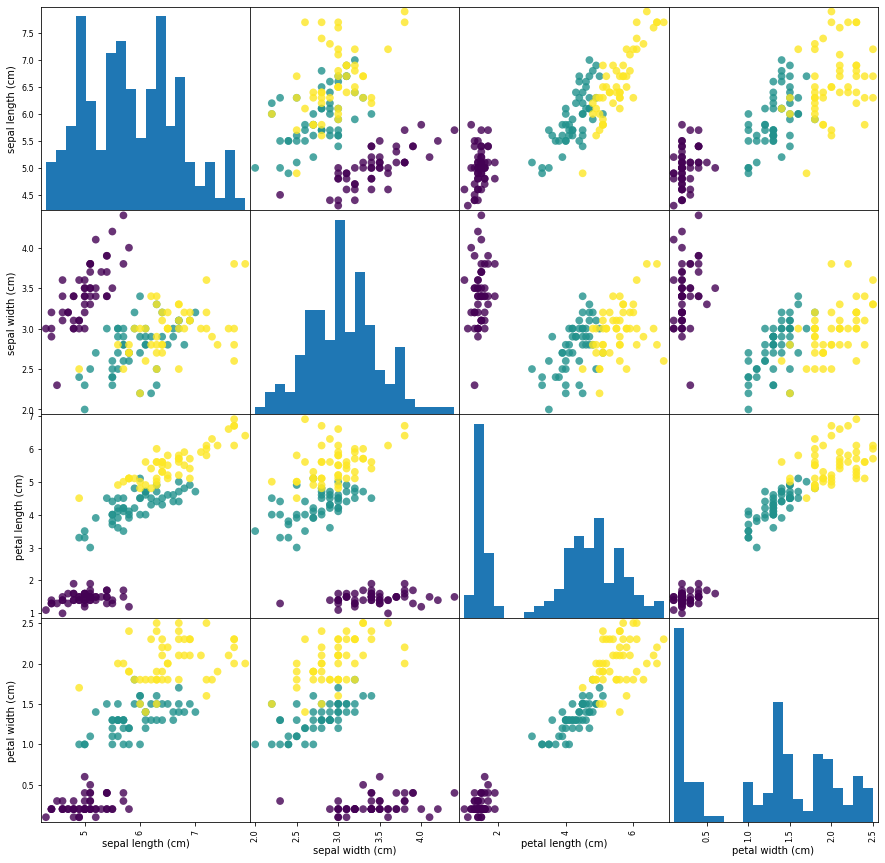

In [6]:
pd.plotting.scatter_matrix(irisDF[iris.feature_names], c = irisDF['Type'], figsize=(15, 15), marker='o',
                 hist_kwds={'bins': 20}, s=60, alpha=.8)

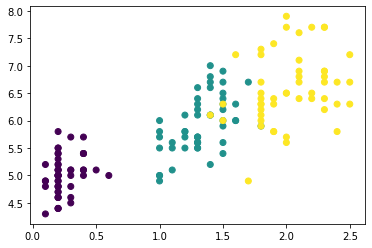

In [7]:
plt.scatter(irisDF['petal width (cm)'], irisDF['sepal length (cm)'], c=irisDF.Type)

In [8]:
Training_set = irisDF[['petal width (cm)','sepal length (cm)']]
Training_set

,petal width (cm),sepal length (cm)
0,0.2,5.1
1,0.2,4.9
2,0.2,4.7
3,0.2,4.6
4,0.2,5.0
...,...,...
145,2.3,6.7
146,1.9,6.3
147,2.0,6.5
148,2.3,6.2


In [9]:
normalized_df=(Training_set-Training_set.min())/(Training_set.max()-Training_set.min())
normalized_df

,petal width (cm),sepal length (cm)
0,0.041667,0.222222
1,0.041667,0.166667
2,0.041667,0.111111
3,0.041667,0.083333
4,0.041667,0.194444
...,...,...
145,0.916667,0.666667
146,0.750000,0.555556
147,0.791667,0.611111
148,0.916667,0.527778


In [10]:
K_list = np.random.randn(2,2)
K_list

array([[-1.52039516, -0.88588642],
       [-0.75035853, -0.19411545]])

In [11]:
diff1 = normalized_df[['petal width (cm)','sepal length (cm)']] - K_list[0,:]
diff1

,petal width (cm),sepal length (cm)
0,1.562062,1.108109
1,1.562062,1.052553
2,1.562062,0.996998
3,1.562062,0.969220
4,1.562062,1.080331
...,...,...
145,2.437062,1.552553
146,2.270395,1.441442
147,2.312062,1.496998
148,2.437062,1.413664


In [12]:
sub1 = np.zeros(len(diff1))
for i in range(len(diff1)):
    x = diff1.iloc[i]['petal width (cm)']
    y = diff1.iloc[i]['sepal length (cm)']
    sub1[i] = sqrt(x**2+y**2)
sub1

array([1.91518718, 1.88358837, 1.85311663, 1.838321  , 1.89925036,
       2.03146726, 1.87385485, 1.89925036, 1.80964621, 1.84918075,
       1.96457913, 1.86820812, 1.8335119 , 1.75965798, 2.0338834 ,
       2.08143636, 2.03146726, 1.94932036, 2.04865741, 1.94932036,
       1.96457913, 1.98374142, 1.838321  , 2.01843563, 1.86820812,
       1.89925036, 1.96835973, 1.93139202, 1.93139202, 1.85311663,
       1.86820812, 2.03146726, 1.89785126, 1.98154838, 1.88358837,
       1.89925036, 1.98154838, 1.84918075, 1.80964621, 1.91518718,
       1.93366488, 1.85963923, 1.80964621, 2.03853305, 1.98374142,
       1.90318405, 1.91518718, 1.838321  , 1.94785819, 1.89925036,
       2.63215185, 2.56598524, 2.64795902, 2.35976554, 2.58199055,
       2.38894301, 2.58466156, 2.16803847, 2.53119267, 2.35421684,
       2.18165937, 2.48906685, 2.33173367, 2.48450803, 2.3742366 ,
       2.58118579, 2.44554215, 2.29981899, 2.53458479, 2.30373856,
       2.59557526, 2.45003628, 2.55018206, 2.4157913 , 2.49811

In [13]:
diff2 = normalized_df[['petal width (cm)','sepal length (cm)']] - K_list[1,:]
diff2

,petal width (cm),sepal length (cm)
0,0.792025,0.416338
1,0.792025,0.360782
2,0.792025,0.305227
3,0.792025,0.277449
4,0.792025,0.388560
...,...,...
145,1.667025,0.860782
146,1.500359,0.749671
147,1.542025,0.805227
148,1.667025,0.721893


In [14]:
sub2 = np.zeros(len(diff2))
for i in range(len(diff2)):
    x = diff2.iloc[i]['petal width (cm)']
    y = diff2.iloc[i]['sepal length (cm)']
    sub2[i] = sqrt(x**2+y**2)
sub2

array([0.89478544, 0.87032618, 0.84880338, 0.83921496, 0.88220333,
       1.00793039, 0.87864666, 0.88220333, 0.82252083, 0.83258733,
       0.93646945, 0.85918322, 0.82093229, 0.77506047, 1.00017934,
       1.05173505, 1.00793039, 0.93186865, 1.01731814, 0.93186865,
       0.93646945, 0.96932431, 0.83921496, 1.00711086, 0.85918322,
       0.88220333, 0.95772196, 0.9080432 , 0.9080432 , 0.84880338,
       0.85918322, 1.00793039, 0.87193834, 0.95158086, 0.87032618,
       0.88220333, 0.95158086, 0.83258733, 0.82252083, 0.89478544,
       0.91979396, 0.87027452, 0.82252083, 1.03444134, 0.96932431,
       0.89773828, 0.89478544, 0.83921496, 0.92194747, 0.88220333,
       1.60021346, 1.54374888, 1.61814979, 1.35705515, 1.55792292,
       1.37959796, 1.5664028 , 1.18177645, 1.50242893, 1.36622387,
       1.19055055, 1.47867939, 1.30783704, 1.46667153, 1.36809101,
       1.55250603, 1.44464893, 1.28042439, 1.51653019, 1.2923716 ,
       1.59233813, 1.43010235, 1.52994791, 1.39381932, 1.47235

In [15]:
normalized_df[['Cluster']] = 0
for i in range(len(sub1)):
    if sub1[i] < sub2[i]:
        normalized_df.iloc[[i],[2]] = 1
    else:
        normalized_df.iloc[[i],[2]] = 2
normalized_df

,petal width (cm),sepal length (cm),Cluster
0,0.041667,0.222222,2
1,0.041667,0.166667,2
2,0.041667,0.111111,2
3,0.041667,0.083333,2
4,0.041667,0.194444,2
...,...,...,...
145,0.916667,0.666667,2
146,0.750000,0.555556,2
147,0.791667,0.611111,2
148,0.916667,0.527778,2


In [16]:
normalized_df['Cluster'].value_counts()

2    150
Name: Cluster, dtype: int64

In [17]:
K_list[0,0] = normalized_df[normalized_df['Cluster'] == 1]['petal width (cm)'].mean()
K_list[0,1] = normalized_df[normalized_df['Cluster'] == 1]['sepal length (cm)'].mean()

In [18]:
K_list[1,0] = normalized_df[normalized_df['Cluster'] == 2]['petal width (cm)'].mean()
K_list[1,1] = normalized_df[normalized_df['Cluster'] == 2]['sepal length (cm)'].mean()

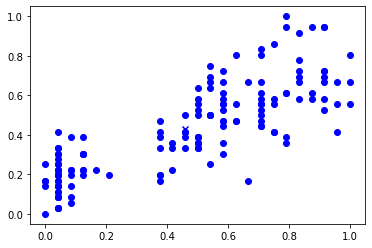

In [19]:
plt.figure()
plt.scatter(normalized_df[normalized_df['Cluster']== 1]['petal width (cm)'], 
                    normalized_df[normalized_df['Cluster']== 1]['sepal length (cm)'], c='red')
plt.scatter(normalized_df[normalized_df['Cluster']== 2]['petal width (cm)'], 
                    normalized_df[normalized_df['Cluster']== 2]['sepal length (cm)'], c='blue')
plt.scatter(K_list[0,0], K_list[0,1], c='red', marker = 'x')
plt.scatter(K_list[1,0], K_list[1,1], c='blue', marker = 'x')
plt.show()

In [20]:
K_list

array([[       nan,        nan],
       [0.45805556, 0.4287037 ]])

In [21]:
dist = (1/len(normalized_df))*(sum(sub1**2)+sum(sub2**2))
dist

7.796087566332642

In [301]:
def ClusterAlg(data, K):
    
    data[['Cluster']] = 0
    DistL = []
    colorL = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black']
    
    K_list = np.random.rand(K,2)
    Sub = np.zeros((len(data),K))
    while True:
        for k in range(K):
            diff = data[['petal width (cm)','sepal length (cm)']] - K_list[k,:]
            for s in range(len(diff)):
                x = diff.iloc[s]['petal width (cm)']
                y = diff.iloc[s]['sepal length (cm)']
                Sub[s,k] = sqrt(x**2+y**2)   
    
        for R in range(len(data)):
            Min = min(Sub[R,:])
            for C in range(K):
                if Sub[R,C] == Min:
                    data.iloc[[R],[2]] = C+1
                    
        plt.figure()
        for k in range(K):
            plt.scatter(data[data['Cluster']==k+1]['petal width (cm)'],data[data['Cluster']==k+1]['sepal length (cm)']
               ,c= colorL[k])
            plt.scatter(K_list[k,0], K_list[k,1], c=colorL[k], marker = 'x')
        plt.show()
        
        
                    
        dist = 0
        for k in range(K):
            x = data[data['Cluster']== k+1][['petal width (cm)']] - K_list[k,0]
            y = data[data['Cluster']== k+1][['sepal length (cm)']] - K_list[k,1]
            X_Ci = np.sqrt((x.iloc[:,0])**2 + (y.iloc[:,0])**2)
            dist += X_Ci.T@X_Ci
            K_list[k,0] = data[data['Cluster'] == k+1]['petal width (cm)'].mean()
            K_list[k,1] = data[data['Cluster'] == k+1]['sepal length (cm)'].mean()
            print(dist)
            
            
        d = (1/len(data))*(dist)
        print(d)
        DistL.append(d)
        
        if len(DistL)>1:
            if abs(DistL[-1] - DistL[-2]) < 0.01:
                break
            if data.Cluster.nunique() < K:
                break
                
                
    return K_list,data,DistL

In [186]:
normalized_df=(Training_set-Training_set.min())/(Training_set.max()-Training_set.min())

In [315]:
D = []

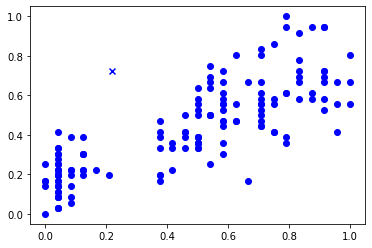

44.58789328248487
0.2972526218832325


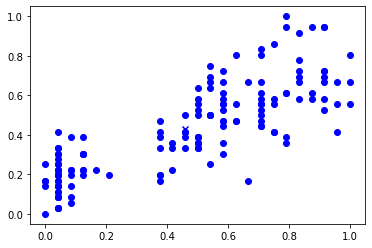

22.912861368312754
0.15275240912208504


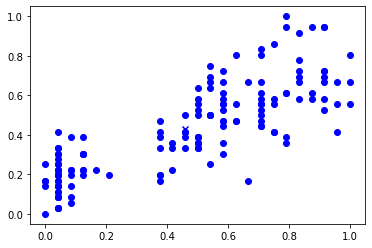

22.912861368312754
0.15275240912208504
[0.2972526218832325, 0.15275240912208504, 0.15275240912208504]


In [316]:
K_list,data,DistL = ClusterAlg(normalized_df, 1)
print(DistL)
D.append(min(DistL))

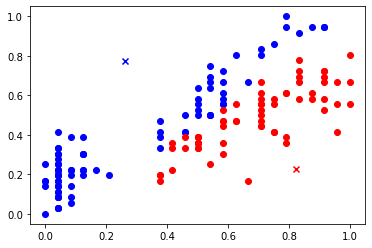

25.56888387463544
34.607072328373675
0.23071381552249118


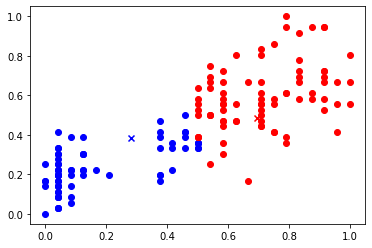

5.50922811755103
10.481335804665228
0.06987557203110152


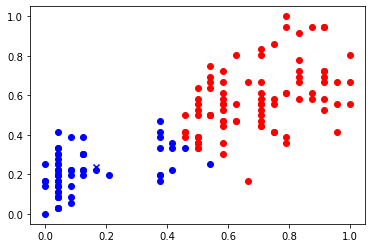

2.0944541288737715
6.8483700239355
0.04565580015957


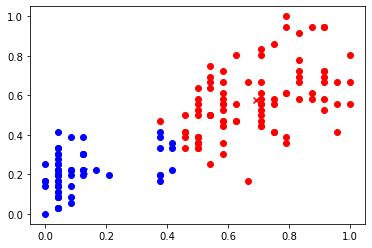

1.5481058744748912
6.5879207241633795
0.04391947149442253
[0.23071381552249118, 0.06987557203110152, 0.04565580015957, 0.04391947149442253]


In [317]:
K_list,data,DistL = ClusterAlg(normalized_df, 2)
print(DistL)
D.append(min(DistL))

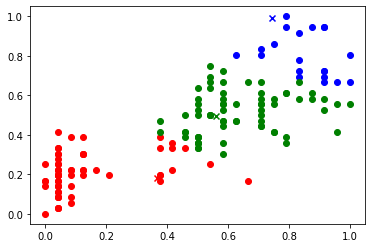

1.3228369044573305
6.881870111538037
9.536632768751286
0.06357755179167525


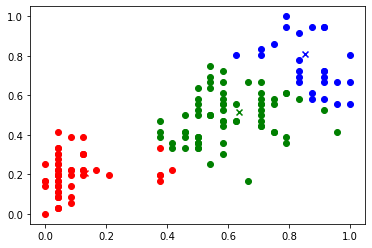

0.7510889274691352
1.8961822271761701
4.130431422023192
0.027536209480154616


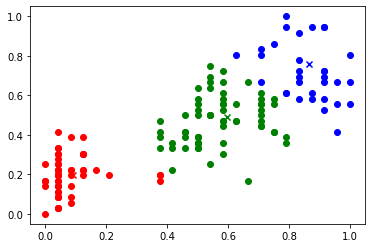

0.9810363247863247
1.8330045550689489
3.652727067392587
0.02435151378261725
[0.06357755179167525, 0.027536209480154616, 0.02435151378261725]


In [318]:
K_list,data,DistL = ClusterAlg(normalized_df, 3)
print(DistL)
D.append(min(DistL))

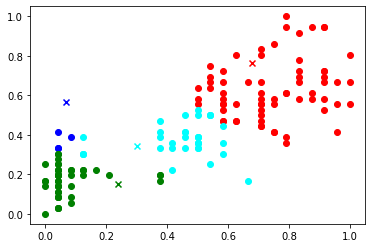

0.16261331169886195
4.402803335930601
6.196261403471263
7.796157379106045
0.05197438252737364


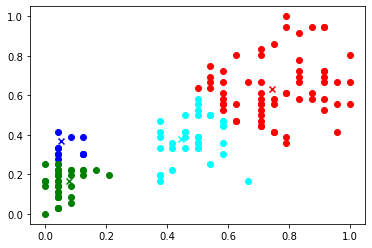

0.05621865354938266
2.633010275868962
2.912547312905999
3.5896348179788338
0.02393089878652556


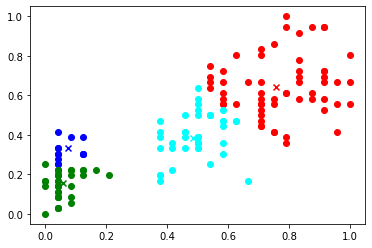

0.05300479542903787
2.415067241578051
2.656237666331097
3.4262049872556246
0.022841366581704166
[0.05197438252737364, 0.02393089878652556, 0.022841366581704166]


In [319]:
K_list,data,DistL = ClusterAlg(normalized_df, 4)
print(DistL)
D.append(min(DistL))

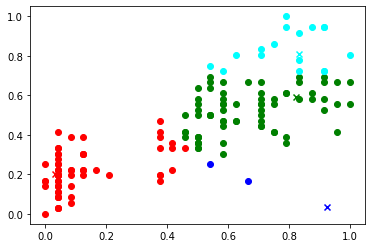

0.2781440378161748
2.5739225813475164
7.163703917783049
7.613615905045266
0.05075743936696844


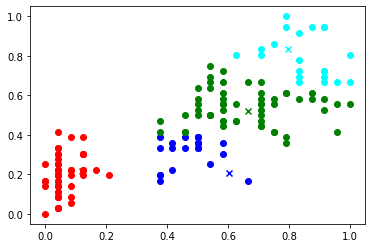

0.8791473765432091
1.6451192980862697
3.353492943840868
3.8908730647345413
0.025939153764896944


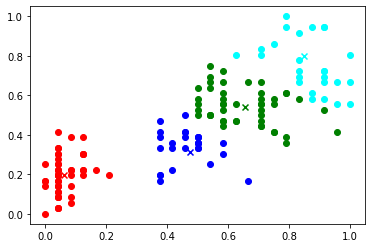

0.3667881466176918
0.9310358318028769
1.9027102833910197
2.6384154708157834
0.017589436472105223
[0.05075743936696844, 0.025939153764896944, 0.017589436472105223]


In [306]:
K_list,data,DistL = ClusterAlg(normalized_df, 4)
print(DistL)

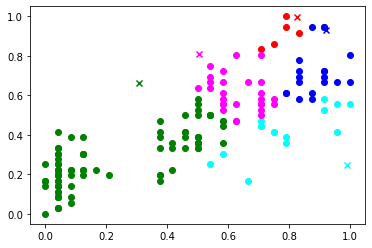

1.196338641349585
1.272462610660863
19.45420990182168
21.0190339828418
22.88128813969839
0.15254192093132263


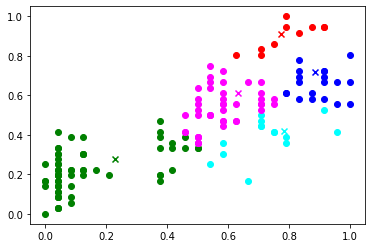

0.2501015269655615
0.37942251461988247
3.317399299984234
3.6790316730980885
4.792176847021441
0.03194784564680961


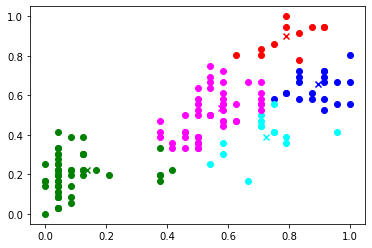

0.20614996922129875
0.3481329939126568
1.5659290370260825
1.8423289488426609
2.978574809134176
0.01985716539422784


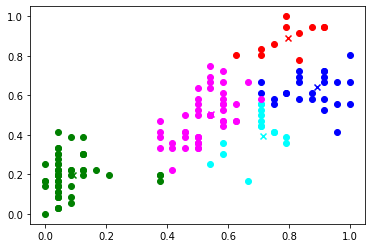

0.35202932098765427
0.492496492704826
1.3444647229874502
1.602204392929501
2.612003158361599
0.01741335438907733
[0.15254192093132263, 0.03194784564680961, 0.01985716539422784, 0.01741335438907733]


In [320]:
K_list,data,DistL = ClusterAlg(normalized_df, 5)
print(DistL)
D.append(min(DistL))

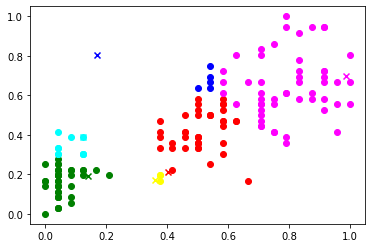

0.7481726134572155
3.5090161348304787
4.0986971913880605
4.172972371114746
8.104655625020914
8.106719972295
0.054044799815300006


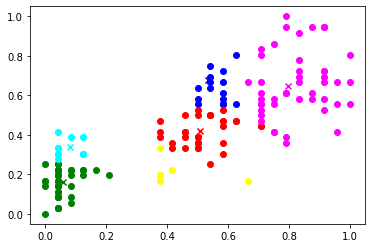

0.14452160493827174
0.5376381655092594
0.7967614293981482
0.8340203028549383
2.457625763900303
2.568608274188369
0.017124055161255796


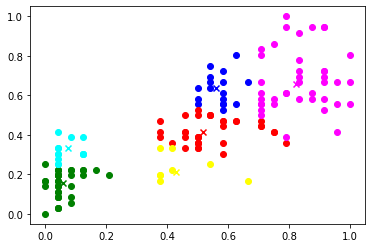

0.1350154320987654
0.6900376724763978
0.9312080972294435
0.9842128926584814
2.2907286676927754
2.4069623782551894
0.016046415855034597
[0.054044799815300006, 0.017124055161255796, 0.016046415855034597]


In [322]:
K_list,data,DistL = ClusterAlg(normalized_df, 6)
print(DistL)
D.append(min(DistL))

In [323]:
D

[0.15275240912208504,
 0.04391947149442253,
 0.02435151378261725,
 0.022841366581704166,
 0.01741335438907733,
 0.016046415855034597]

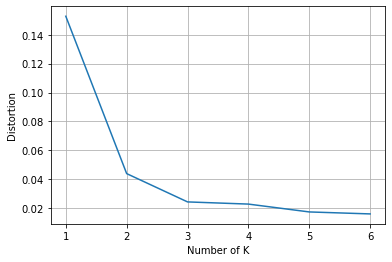

In [324]:
plt.plot(range(1,7), D)
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.grid()